In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [ ]:
x_train, y_train = make_moons(n_samples = 100, noise = 0.1)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([100, 2])
torch.Size([100])


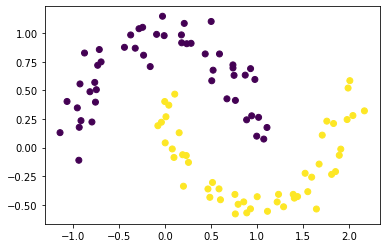

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis')

In [ ]:
class FeedForward_TwoLayer(torch.nn.Module):
  
  def __init__(self, input_size, hidden1_size, hidden2_size, output_dim):
    super(FeedForward_TwoLayer, self).__init__()
    self.input_size = input_size
    self.hidden1_size = hidden1_size
    self.hidden2_size = hidden2_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden1_size)
    self.relu1 = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(self.hidden1_size, self.hidden2_size)
    self.relu2 = torch.nn.ReLU()
    self.fc3 = torch.nn.Linear(self.hidden2_size, output_dim)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    z1 = self.fc1(x)
    a1 = self.relu1(z1)
    z2 = self.fc2(a1)
    a2 = self.relu2(z2)
    z3 = self.fc3(a2)
    a3 = self.sigmoid(z3)
    return a3

In [ ]:
model = FeedForward_TwoLayer(2, 5, 8, 1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
print(model)

FeedForward_TwoLayer(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=5, out_features=8, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Epoch 20000: train loss: 0.003227538662031293


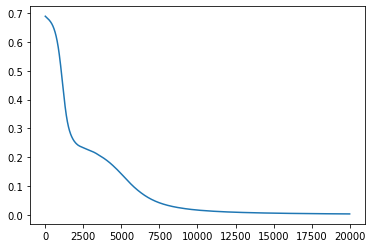

In [ ]:
model.train()
epoch = 20000
Loss = []
for i in range(epoch):
  optimizer.zero_grad()
  y_pred = model(x_train)
  loss = criterion(y_pred.squeeze(), y_train)
  Loss.append(loss.item())
  loss.backward()
  optimizer.step()
print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
plt.plot(np.arange(len(Loss)),Loss)

xx.shape:  (58, 74)
torch.Size([4292, 1])


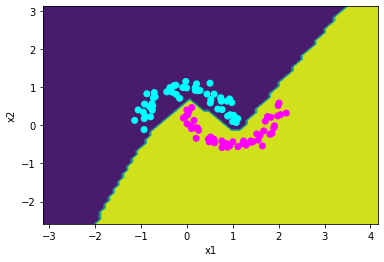

In [ ]:
X = x_train
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print('xx.shape: ', xx.shape)
Xn = (np.c_[xx.ravel(), yy.ravel()])
Xn = torch.FloatTensor(Xn)
P = model(Xn)
P = torch.round(P)
PP = P.detach().numpy()
PP = PP.reshape(xx.shape)
print(P.shape)
# t = [10 if y_train[i] == 0 else 1 for i in range(np.shape(y_train)[0])]
plt.contourf(xx, yy, PP, cmap = 'viridis')
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(x_train[:,0], x_train[:,1], c = y_train, cmap = 'cool')